In [3]:
pip install -U plotly

     |████████████████████████████████| 11.5MB 7.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
from urllib.request import urlopen
import json
import plotly
from google.colab import files
print(plotly.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4.7.1


# Import, Update Date Types, and Set Seaborn

In [0]:
uploaded = files.upload()

Saving us_daily.csv to us_daily.csv


In [0]:
df_states = pd.read_csv('state_daily.csv')
df_us = pd.read_csv('us_daily.csv')

In [0]:
df_states.info()

In [0]:
df_states["date"] = pd.to_datetime(df_states['date'].astype(str), format='%Y%m%d')
df_us["date"] = pd.to_datetime(df_us['date'].astype(str), format='%Y%m%d')

In [0]:
sns.set()

# State by State Testing Capacity over Time

In [0]:
state_for_testing = "WA" #@param ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA','MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE','NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI','SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV','WY']
fig = px.line(df_states.loc[df_states['state'] == state_for_testing], x="date", y="total", title='Testing Capacity Over Time in {}'.format(state_for_testing), labels = {"total": "Testing Capacity"})
fig.show()

# Add State Population Data

In [0]:
df_state_names = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/state_names.csv')

In [0]:
df_pop = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/us_population.csv')

In [0]:
df_pop = pd.merge(df_pop, df_state_names, on='State', sort=False)

In [0]:
df_states_pop = pd.merge(df_states, df_pop.drop(columns = 'State').rename(columns={"Abbreviation": "state"}), how = 'left', on='state')

In [0]:
df_states_pop["Population"] = df_states_pop['Population'].astype('float64')

In [0]:
df_states_pop["tests_per_1000"] = df_states_pop["total"] / df_states_pop["Population"] * 1000

In [0]:
df_states_pop.tests_per_1000.describe()

count    3263.000000
mean        6.607114
std         8.170464
min         0.000000
25%         0.214800
50%         3.794967
75%        10.157893
max        66.009604
Name: tests_per_1000, dtype: float64

# Population Normalized State-by-State Testing Over Time

In [0]:
state_for_poptesting = "NY" #@param ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA','MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE','NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI','SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV','WY']
fig = px.line(df_states_pop.loc[df_states_pop['state_abbr'] == state_for_poptesting], x="date", y="tests_per_1000", title='Testing Capacity per 1000 People Over Time in {}'.format(state_for_poptesting), labels = {"total": "Testing Capacity"})
fig.show()

# Percent Positive Testing Results Ratio by State over Time

In [0]:
state_for_posnegtesting = "CA" #@param ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA','MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE','NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI','SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV','WY']
df___ = df_states_pop[df_states_pop['state_abbr'] == state_for_posnegtesting]
df___["positive_tests_pct"] = df___["positive"] / df___["total"] * 100
fig = px.line(df___, x="date", y="positive_tests_pct", title='Percent Positive Tests Over Time in {}'.format(state_for_posnegtesting), labels = {"total": "Total Positive over Negative Tests"})
fig.show()
del(df___)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Merging GeoID Data

In [0]:
df_fips = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/fips_codes.csv')

In [0]:
df_states_pop = pd.merge(df_states_pop, df_fips, on ='state')

In [0]:
df_states_pop.loc[df_states_pop["date"] == dt.strptime('2020-05-02', '%Y-%m-%d')][["fips", "tests_per_1000"]]

# DUMP DATA

In [0]:
df_states_pop.to_csv('{}_df_cleaned_state_pop.csv'.format(dt.now().strftime('%m-%d'))) 

In [0]:
files.download('{}_df_cleaned_state_pop.csv'.format(dt.now().strftime('%m-%d')))

# More Data Engineering on df_states_pop

In [0]:
df_states_pop = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/cleaned/df_cleaned_state_pop.csv', index_col=[0])

In [0]:
df_states_pop["date"] = pd.to_datetime(df_states_pop['date'], format='%Y-%m-%d')

In [0]:
df_states_pop.drop(columns = 'tests_per_million', inplace=True)

In [0]:
df_states_pop = pd.merge(df_states_pop, df_state_names, left_on = 'state_abbr', right_on= 'Abbreviation')
df_states_pop.drop(columns = 'Abbreviation', inplace=True)

In [0]:
df_states_pop['fips'] = df_states_pop['fips'].apply(lambda x: str(x) if x > 9 else "0" + str(x))

In [0]:
df_states_pop.rename(columns={"state": "state_abbr", "State": "state_name"}, inplace=True)

# Map Across the US with Plotly (and Reload Data)

In [21]:
day_df__ = df_states_pop.loc[df_states_pop["date"] == dt.strptime('2020-05-02', '%Y-%m-%d')][["fips", "tests_per_1000", "state_name"]]
# day_df__['fips'] = day_df__['fips'].apply(lambda x: str(x) if x > 9 else "0" + str(x))
fig = px.choropleth_mapbox(day_df__, 
                           geojson='https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/2010_us_states_geojson.json',
                           color='tests_per_1000',
                           locations='fips', featureidkey = 'properties.STATE', 
                           color_continuous_scale="thermal",
                           hover_name = 'state_name',
                           mapbox_style="carto-positron",
                           range_color =(0, 70),
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.75,
                           labels={'tests_per_1000':'Tests Per 1000 People'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
fig = px.choropleth(df_states_pop.loc[df_states_pop["date"] == dt.strptime('2020-05-02', '%Y-%m-%d')][["state_abbr", "tests_per_1000", "state_name"]], 
                           color='tests_per_1000',
                           locationmode = 'USA-states',
                           locations='state_abbr',
                           color_continuous_scale="thermal",
                           hover_name = 'state_name',
                           scope = 'usa',
                           labels={'tests_per_1000':'Tests Per 1000 People'}, 
                           title = "US State-By-State Tests per 1000 People on {}".format('2020-05-02')
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# State-by-State Map Through Time with Animation 

In [0]:
df_states_pop = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/cleaned/05-03_df_cleaned_state_pop.csv', index_col=[0])

In [0]:
df_states_pop["date"] = pd.to_datetime(df_states_pop['date'], format='%Y-%m-%d')

In [0]:
df_states_pop['fips'] = df_states_pop['fips'].apply(lambda x: str(x) if x > 9 else "0" + str(x))

In [0]:
# sort on datetime 
df_states_pop = df_states_pop.sort_values(by='date')

In [0]:
df_states_pop['date_str'] = df_states_pop['date'].apply(lambda x: dt.strftime(x, "%Y-%m-%d"))

In [0]:
fig = px.choropleth(df_states_pop[["state_abbr", "tests_per_1000", "state_name", "date_str"]], 
                           color='tests_per_1000',
                           locationmode = 'USA-states',
                           locations='state_abbr',
                           color_continuous_scale="thermal_r",
                           hover_name = 'state_name',
                           scope = 'usa',
                           animation_frame = 'date_str',
                           animation_group = 'date_str', 
                           labels={'tests_per_1000':'Tests Per 1000 People'}, 
                           title = "US State-By-State Tests per 1000 People")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
## FLIP Color code 

# Plot of Testing & Cases

In [0]:
top_10_states = df_states_pop.loc[df_states_pop["date"] == dt.strptime('2020-05-02', '%Y-%m-%d')].sort_values(by = 'totalTestResults').tail(10)['state_abbr']

In [0]:
df_top10_select = df_states_pop.loc[(df_states_pop["state_abbr"].isin(top_10_states)) & (df_states_pop["date"] >= dt.strptime('2020-03-15', '%Y-%m-%d')),].copy()

In [0]:
fig = px.scatter(df_top10_select, x="date_str", y="totalTestResults",
	         size="positive", color="state_abbr",
                 hover_name="state_name", size_max=60,
                 title = "Top 10 Most Tested States over Time with Case Count in Bubbles")
fig.show()

In [0]:
fig = px.scatter(df_top10_select, x="date_str", y="tests_per_1000",
	         size="positive", color="state_abbr",
                 hover_name="state_name", size_max=60,
                 title = "Top 10 States with Tests Per 1000 People over Time with Case Count in Bubbles")
fig.show()

In [0]:
fig = px.scatter(df_top10_select, x="totalTestResults", y="positive",
	               color="state_abbr",
                 hover_name="state_name", size_max=60,
                 title = "Total Tests by Total Positive Count Case for Top 10 Most Tested States")
fig.show()

In [0]:
df_top10_select["percentPositive"] = df_top10_select["positiveIncrease"] / df_top10_select["totalTestResultsIncrease"] * 100

In [0]:
df_top10_select["percentPositive"] = df_top10_select["percentPositive"].fillna(value=0)

In [0]:
fig = px.scatter(df_top10_select, x="totalTestResults", y="percentPositive", color = "state_abbr", trendline = "ols", hover_name = "state_name")
fig.show()

In [0]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.1)
  q3 = df[col].quantile(0.99)

  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)

  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

In [0]:
df_top10_2_noout = remove_outlier(df_top10_select, "totalTestResultsIncrease")

In [0]:
fig = px.scatter(df_top10_2_noout, x="totalTestResultsIncrease", y="positiveIncrease",
	              color="state_abbr", trendline = "ols", 
                 hover_name="state_name", hover_data = ["date_str", "totalTestResults"], size_max=60,
                 title = "Total Tests Increase by Total Positive Count Increase Case for Top 10 Most Tested States")
fig.show()

In [0]:
results = px.get_trendline_results(fig)
print(results)

  state_abbr                                     px_fit_results
0         MA  <statsmodels.regression.linear_model.Regressio...
1         IL  <statsmodels.regression.linear_model.Regressio...
2         FL  <statsmodels.regression.linear_model.Regressio...
3         CA  <statsmodels.regression.linear_model.Regressio...
4         NJ  <statsmodels.regression.linear_model.Regressio...
5         WA  <statsmodels.regression.linear_model.Regressio...
6         PA  <statsmodels.regression.linear_model.Regressio...
7         MI  <statsmodels.regression.linear_model.Regressio...
8         TX  <statsmodels.regression.linear_model.Regressio...
9         NY  <statsmodels.regression.linear_model.Regressio...


In [0]:
results.query("state_abbr == 'IL'").px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     401.8
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.14e-24
Time:                        11:38:03   Log-Likelihood:                -341.13
No. Observations:                  49   AIC:                             686.3
Df Residuals:                      47   BIC:                             690.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.6084     63.728      2.457      0.018      28.404     284.813
x1             0.1695      0.008     20.045      0.000       0.153       0.187
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                1.911
Skew:                           0.125   Prob(JB):                        0.385
Kurtosis:                       2.065   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Auto-Correlation

In [0]:
df_top10_select.corr()

In [0]:
from pandas.plotting import autocorrelation_plot

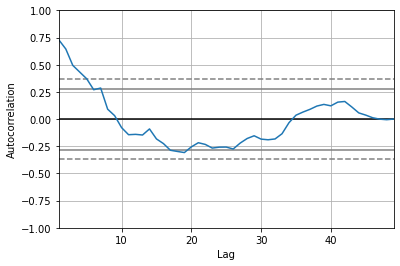

In [0]:
autocorrelation_plot(df_top10_select.set_index(['state_abbr', 'date']).loc['WA']["positiveIncrease"])

# Heat Map of Correlations

In [0]:
# EXAMPLE
df_ny_select = df_states_pop.set_index(['state_abbr', 'date']).loc['NY'].copy()

In [0]:
# https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1)
    return df


In [0]:
def heatmap(df, columns_compare, column_shift, lag):
  columns = columns_compare + [column_shift]
  print(columns)
  df_new = df_derived_by_shift(df[columns], lag, columns_compare)
  mask = np.zeros_like(df_new.corr())
  mask[np.triu_indices_from(mask)] = True
  svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

['positiveIncrease', 'totalTestResultsIncrease']


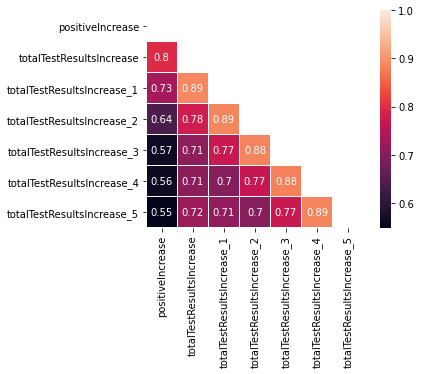

In [0]:
heatmap(df_ny_select, columns_compare=['positiveIncrease'], column_shift = "totalTestResultsIncrease", lag = 5)

['deathIncrease', 'positiveIncrease']


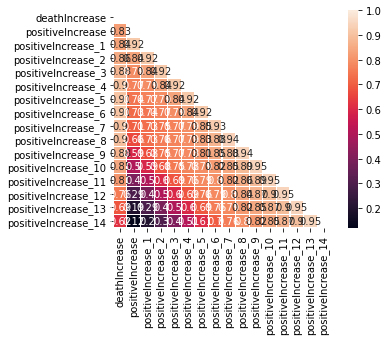

In [0]:
heatmap(df_ny_select, columns_compare=['deathIncrease'], column_shift = "positiveIncrease", lag = 14)

# Death Lag Exploration 
1. Plot lag positiveIncrease on x access, deathIncrease on y access 
2. Repeat with all data 

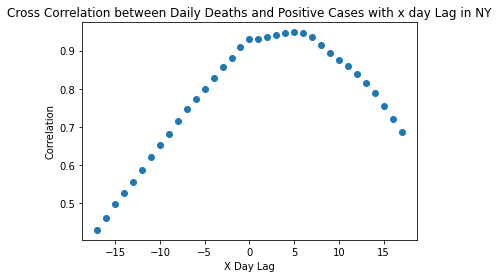

In [0]:
# Matplotlib cross and auto correlation plots 
## NY ONLY
plt.xcorr(df_ny_select["deathIncrease"].fillna(0),df_ny_select["positiveIncrease"].fillna(0),maxlags=17, usevlines=0)
plt.title("Cross Correlation between Daily Deaths and Positive Cases with x day Lag in NY")
plt.ylabel("Correlation")
plt.xlabel("X Day Lag")
plt.savefig("cross_corr_daily_deaths_and_cases.png")
plt.show()

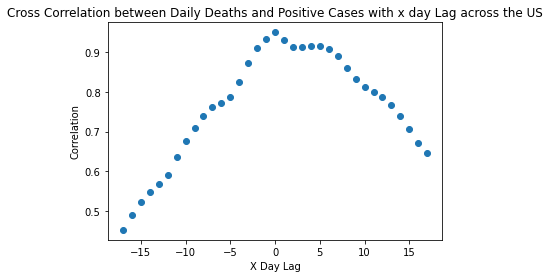

In [0]:
## REPEATED for all states summed 
plt.xcorr(df_states_pop[["date","deathIncrease"]].groupby('date').sum().dropna()["deathIncrease"],df_states_pop[["date","positiveIncrease"]].groupby('date').sum().dropna()["positiveIncrease"],maxlags=17, usevlines=0)
plt.title("Cross Correlation between Daily Deaths and Positive Cases with x day Lag across the US")
plt.ylabel("Correlation")
plt.xlabel("X Day Lag")
plt.savefig("cross_corr_daily_deaths_and_cases.png")
plt.show()

# Lagged Plots and Correlations (using NY for example)

In [0]:
df_ny_select["positive_14_lag"] = df_ny_select["positive"].shift(14)

In [0]:
fig = px.scatter(df_ny_select.iloc[14:], x="positive_14_lag", y="death", 
                 hover_name="state_name", size_max=60,
                 title = "Case Counts and Deaths with a 14 Day Lag in NY")
fig.show()

In [0]:
df_ny_select["positive_2_lag"] = df_ny_select["positive"].shift(2)

In [0]:
fig = px.scatter(df_ny_select.iloc[2:], x="positive_2_lag", y="totalTestResults", 
                 hover_name="state_name", size_max=60,
                 title = "Case Counts and Total Tests with a 2 Day Lag in NY")
fig.show()

In [0]:
# make sure sorted
day_100th_case = df_ny_select[df_ny_select.positive > 100].first_valid_index()

In [0]:
df_ny_select["days_since_100_cases"] = df_ny_select.index.to_series().apply(lambda x: (x - day_100th_case).days)

In [0]:
df_ny_select["positiveIncrease_14_lag"] = df_ny_select["positiveIncrease"].shift(14)

In [0]:
fig = px.scatter(df_ny_select.iloc[14:], x="positiveIncrease_14_lag", y="deathIncrease", 
                 size = "days_since_100_cases", hover_name="state_name", hover_data = ["date_str"], size_max=60,
                 title = "Daily Case Count and Daily Deaths with a 14 Day Lag in NY")
fig.show()

In [0]:
df_ny_select["testsIncrease_3_lag"] = df_ny_select["totalTestResultsIncrease"].shift(3)

In [0]:
fig = px.scatter(df_ny_select.iloc[4:], x="testsIncrease_3_lag", y="positiveIncrease", 
                 size = "days_since_100_cases", hover_name="state_name", size_max=60,
                 title = "Daily Case Counts and Tests with a 3 Day Lag in NY")
fig.show()

In [0]:
df_ny_select.head(5)

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Population,tests_per_1000,FIPS,state_name,date_str,positive_14_lag,positive_2_lag,days_since_100_cases,positiveIncrease_14_lag,positiveIncrease_3_lag
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e095e2b3db515b00d892276e6cac6912b1e0111,2020-03-04T21:00:00Z,NaN,NaN,78.0,54.0,54.0,36,NaN,NaN,NaN,NaN,NaN,19453561.0,0.004010,36,New York,2020-03-04,NaN,NaN,-4,NaN,NaN
2020-03-05,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a5eb1a3c895ee3acd8c87b19363bab6d581b3933,2020-03-05T21:00:00Z,NaN,NaN,122.0,98.0,98.0,36,0.0,0.0,28.0,16.0,44.0,19453561.0,0.006271,36,New York,2020-03-05,NaN,NaN,-3,NaN,NaN
2020-03-06,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18e7306085561597629e7ffac110572b1aa9f9e5,2020-03-06T21:00:00Z,NaN,NaN,361.0,125.0,125.0,36,0.0,0.0,16.0,11.0,27.0,19453561.0,0.018557,36,New York,2020-03-06,NaN,6.0,-2,NaN,NaN
2020-03-07,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53a82f90b4d4a28a5b06248b1e4c78e9229312dd,2020-03-07T21:00:00Z,NaN,NaN,404.0,168.0,168.0,36,0.0,0.0,0.0,43.0,43.0,19453561.0,0.020767,36,New York,2020-03-07,NaN,22.0,-1,NaN,NaN
2020-03-08,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f6d3b78f41cadeaf08e72f35692a9619d70aad07,2020-03-08T20:00:00Z,NaN,NaN,197.0,197.0,197.0,36,0.0,0.0,0.0,29.0,29.0,19453561.0,0.010127,36,New York,2020-03-08,NaN,33.0,0,NaN,16.0


# Multi-variate Regression 
1. Multi-variate regression with 100 days since 1st case factor, remove totalTests, totalPos, etc
2. Panel Regression across States for tests vs. cases, cases vs. deaths, tests vs. deaths 

In [0]:
# Add days since 100th case of COVID-19 in each state 
dict_states_100th_case_day = {}
df_indexed = df_states_pop.set_index('date')
for state in df_states_pop.state_abbr.unique():
  dict_states_100th_case_day[state] = df_indexed.query('state_abbr == @state & positive > 100').first_valid_index()

In [0]:
df_states_pop["days_since_100_cases"] = df_states_pop.apply(lambda x: (x["date"] - dict_states_100th_case_day[x["state_abbr"]]).days, axis=1)

In [0]:
import statsmodels.api as sm

In [0]:
# add weekday 
df_states_pop["weekday"] = df_states_pop["date"].apply(lambda x: x.weekday())

In [0]:
df_states_pop.columns

Index(['date', 'state_abbr', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'Population', 'tests_per_1000', 'FIPS',
       'state_name', 'date_str', 'days_since_100_cases', 'weekday'],
      dtype='object')

In [0]:
def runMultiVariateRegression(df, x_cols, y_col, dummy_cols): 
  df_dummies = pd.get_dummies(df[x_cols + [y_col]].fillna(0), columns=dummy_cols)
  x = df_dummies.drop(y_col, axis = 1)
  y = df_dummies[y_col]
  X = sm.add_constant(x)
  model = sm.OLS(y, X).fit()
  return model, X

In [0]:
model, X = runMultiVariateRegression(df_states_pop, ["state_abbr", "recovered", "totalTestResults", "deathIncrease", "totalTestResultsIncrease", "Population", "days_since_100_cases", "weekday"], "positiveIncrease", ['state_abbr', 'weekday'])

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       positiveIncrease   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     308.8
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        11:43:11   Log-Likelihood:                -22180.
No. Observations:                3025   AIC:                         4.448e+04
Df Residuals:                    2963   BIC:                         4.486e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4851      8.664     -0.171      0.864     -18.474      15.503
recovered                   -0.0335      0.003    -10.474      0.000      -0.040      -0.027
totalTestResults             0.0005      0.000      2.711      0.007       0.000       0.001
deathIncrease                9.0088      0.167     53.941      0.000       8.681       9.336
totalTestResultsIncrease     0.0324      0.002     16.421      0.000       0.029       0.036
Population                 1.53e-05   1.13e-06     13.485      0.000    1.31e-05    1.75e-05
days_since_100_cases         1.7860      0.499      3.577      0.000       0.807       2.765
state_abbr_AK              -28.5450     48.348     -0.590      0.555    -123.344      66.254
state_abbr_AL              -79.2142     49.041     -1.615      0.106    -175.372      16.944
state_abbr_AR              -47.3831     48.556     -0.976      0.329    -142.589      47.823
state_abbr_AZ              -90.1292     47.871     -1.883      0.060    -183.993       3.734
state_abbr_CA             -564.7849     38.432    -14.696      0.000    -640.141    -489.429
state_abbr_CO              -26.6603     48.431     -0.550      0.582    -121.621      68.301
state_abbr_CT              -14.4180     49.170     -0.293      0.769    -110.830      81.994
state_abbr_DC                8.1219     47.910      0.170      0.865     -85.819     102.063
state_abbr_DE               21.8902     48.332      0.453      0.651     -72.877     116.657
state_abbr_FL             -272.5069     46.821     -5.820      0.000    -364.311    -180.703
state_abbr_GA              -14.6772     47.764     -0.307      0.759    -108.330      78.976
state_abbr_HI              -45.2863     48.804     -0.928      0.354    -140.979      50.407
state_abbr_IA               41.6097     48.562      0.857      0.392     -53.610     136.829
state_abbr_ID              -30.5259     48.826     -0.625      0.532    -126.262      65.210
state_abbr_IL              164.6172     47.677      3.453      0.001      71.134     258.100
state_abbr_IN              -59.7769     48.640     -1.229      0.219    -155.148      35.594
state_abbr_KS              -23.7801     48.503     -0.490      0.624    -118.884      71.324
state_abbr_KY              -69.4138     48.609     -1.428      0.153    -164.724      25.897
state_abbr_LA               51.5447     49.228      1.047      0.295     -44.981     148.070
state_abbr_MA              224.6746     52.600      4.271      0.000     121.539     327.810
state_abbr_MD               30.1866     48.213      0.626      0.531     -64.347     124.721
state_abbr_ME              -38.5645     48.798     -0.790      0.429    -134.246      57.117
state_abbr_MI             -165.7461     47.334     -3.502      0.000    -258.558     -72.934
state_abbr_MN 

# Panel Regressions 

In [0]:
!pip install linearmodels

     |████████████████████████████████| 1.5MB 4.5MB/s 


In [0]:
from linearmodels import PanelOLS, PooledOLS, RandomEffects

In [0]:
date = pd.Categorical(df_states_pop.date_str)
data = df_states_pop.set_index(['state_abbr', 'date'])
data['date'] = date
data.head()

ValueError: ignored

In [0]:
data.totalTestResultsIncrease.fillna(0, inplace=True)
data.positiveIncrease.fillna(0, inplace=True)

In [0]:
data["weekday"] = data["weekday"].astype('category')

In [0]:
exog_vars = ['totalTestResultsIncrease','Population', 'weekday', 'totalTestResults', 'days_since_100_cases', 'pending']
exog = sm.add_constant(data[exog_vars])

In [0]:
mod = PooledOLS(data.positiveIncrease, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:       positiveIncrease   R-squared:                        0.6977
Estimator:                  PooledOLS   R-squared (Between):              0.8747
No. Observations:                 541   R-squared (Within):               0.4830
Date:                Fri, May 08 2020   R-squared (Overall):              0.6977
Time:                        09:52:38   Log-likelihood                   -3684.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      110.98
Entities:                          37   P-value                           0.0000
Avg Obs:                       14.622   Distribution:                  F(11,529)
Min Obs:                       1.0000                                           
Max Obs:                       60.000   F-statistic (robust):             110.98
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [0]:
mod = RandomEffects(data.positiveIncrease, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:       positiveIncrease   R-squared:                        0.3278
Estimator:              RandomEffects   R-squared (Between):              0.5394
No. Observations:                3025   R-squared (Within):               0.3026
Date:                Fri, May 08 2020   R-squared (Overall):              0.4461
Time:                        09:24:03   Log-likelihood                -2.334e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      147.01
Entities:                          51   P-value                           0.0000
Avg Obs:                       59.314   Distribution:                 F(10,3014)
Min Obs:                       52.000                                           
Max Obs:                       102.00   F-statistic (robust):             146.98
                            

In [0]:
mod = PanelOLS(data.positiveIncrease, exog, entity_effects=True, drop_absorbed=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:       positiveIncrease   R-squared:                        0.4795
Estimator:                   PanelOLS   R-squared (Between):              0.8579
No. Observations:                 541   R-squared (Within):               0.4795
Date:                Fri, May 08 2020   R-squared (Overall):              0.6812
Time:                        09:52:46   Log-likelihood                   -3632.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      115.17
Entities:                          37   P-value                           0.0000
Avg Obs:                       14.622   Distribution:                   F(4,500)
Min Obs:                       1.0000                                           
Max Obs:                       60.000   F-statistic (robust):             115.17
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning:


Variables have been fully absorbed and have removed from the regression:

Population, weekday.1, weekday.2, weekday.3, weekday.4, weekday.5, weekday.6




# Adding Moving Average to Data-set

In [0]:
df_states_pop.set_index(['state_abbr', 'date']).sort_index(inplace=True)

KeyError: ignored

In [0]:
df_states_pop.sort_index(inplace=True)

In [0]:
df_states_pop["MVA_totalTestResultsIncrease"] = df_states_pop.groupby(level=0)['totalTestResultsIncrease'].rolling(window=7).mean().values
df_states_pop["MVA_positiveIncrease"] = df_states_pop.groupby(level=0)['positiveIncrease'].rolling(window=7).mean().values
df_states_pop["MVA_positiveIncrease_yesterday"] = df_states_pop["MVA_positiveIncrease"].shift(1)

In [0]:
df_states_pop.tail(11)

positive  ...  MVA_positiveIncrease_yesterday
state_abbr date                  ...                                
WY         2020-04-22     322.0  ...                        6.428571
           2020-04-23     326.0  ...                        5.000000
           2020-04-24     349.0  ...                        4.285714
           2020-04-25     349.0  ...                        7.571429
           2020-04-26     362.0  ...                        6.285714
           2020-04-27     370.0  ...                        7.571429
           2020-04-28     389.0  ...                        8.142857
           2020-04-29     536.0  ...                        9.857143
           2020-04-30     544.0  ...                       30.571429
           2020-05-01     559.0  ...                       31.142857
           2020-05-02     566.0  ...                       30.000000

[11 rows x 33 columns]

In [0]:
fig = px.scatter(df_states_pop[["MVA_totalTestResultsIncrease", "totalTestResultsIncrease", "state_name"]].dropna(), x="totalTestResultsIncrease", y="MVA_totalTestResultsIncrease", 
                 hover_name="state_name", 
                 title = "MVA of Daily Tests Results")
fig.show()

In [0]:
fig = px.scatter(data[["MVA_positiveIncrease", "positiveIncrease", "state_name"]].dropna(), x="positiveIncrease", y="MVA_positiveIncrease", 
                 hover_name="state_name", 
                 title = "MVA of Daily Positives")
fig.show()

In [0]:
fig = px.scatter(data[["MVA_positiveIncrease_yesterday", "positiveIncrease", "state_name"]].dropna(), x="MVA_positiveIncrease_yesterday", y="positiveIncrease" , 
                 hover_name="state_name", trendline = "ols",
                 title = "7-day MVA of yesterday of Daily Positives")
fig.show()

# Add isWeekday and Number of Days since Lockdown to Data-set

In [0]:
df_states_pop["isWeekday"] = df_states_pop["weekday"].apply(lambda x: 1 if x < 5 else 0) #1 for weekday, 

In [0]:
df_lockdown_dates = pd.read_csv('https://raw.githubusercontent.com/jaisal1024/coronavirus-us-testing/master/data/lockdown_start_date.csv', names=['state_abbr', 'date'], header=None)

In [0]:
df_lockdown_dates["date"] = pd.to_datetime(df_lockdown_dates["date"], format='%d/%m/%y')

In [0]:
df_lockdown_dates.set_index('state_abbr', inplace=True)
# .set_index('state_abbr').to_dict()["date"]

In [0]:
df_states_pop.reset_index(inplace=True)

In [0]:
def daysSinceLockdown(date, state_abbr): 
  if (state_abbr in df_lockdown_dates.index): 
    return max(0, (date - df_lockdown_dates.loc[state_abbr].values[0]).days)
  return 0

In [0]:
df_states_pop["days_since_lockdown"] = df_states_pop.apply(lambda x: daysSinceLockdown(x["date"], x["state_abbr"]), axis=1)

In [0]:
df_states_pop.set_index(["state_abbr", "date"], inplace=True)

# Re-Run Multivariate Regression 

In [0]:
y_var = "positiveIncrease"
exog_vars = ['totalTestResultsIncrease','Population', 'weekday', 'totalTestResults', 'days_since_100_cases', 'pending', 'deathIncrease', 'recovered', 'MVA_totalTestResultsIncrease', 'MVA_positiveIncrease_yesterday', 'days_since_lockdown']

In [0]:
data = df_states_pop[exog_vars + [y_var]].copy()
data.dropna(subset=['MVA_totalTestResultsIncrease', 'MVA_positiveIncrease_yesterday'], inplace=True)
data["weekday"] = data["weekday"].astype('category')
# data["isWeekday"] = data["isWeekday"].astype('category')
exog = sm.add_constant(data.drop(columns = y_var).fillna(0))

In [0]:
model, X = runMultiVariateRegression(df_states_pop.reset_index().dropna(subset=['MVA_totalTestResultsIncrease', 'MVA_positiveIncrease_yesterday']), ["state_abbr", "isWeekday"] + exog_vars, "positiveIncrease", ['state_abbr', 'weekday'])

In [0]:
dfoutput = summary_col(model,stars=True)
print(dfoutput)


                               positiveIncrease
-----------------------------------------------
const                          3.2656          
                               (8.2185)        
isWeekday                      -2.1514         
                               (6.5393)        
totalTestResultsIncrease       0.0214***       
                               (0.0016)        
Population                     0.0000***       
                               (0.0000)        
totalTestResults               -0.0022***      
                               (0.0002)        
days_since_100_cases           2.4080***       
                               (0.8091)        
pending                        0.0071***       
                               (0.0019)        
deathIncrease                  0.8971***       
                               (0.2290)        
recovered                      -0.0266***      
                               (0.0028)        
MVA_totalTestResultsIncrease   0.0319**

In [0]:
!pip install stargazer 
from stargazer.stargazer import Stargazer

In [0]:
pooled_res = PooledOLS(data[y_var], exog).fit()
pooled_res.summary

Dep. Variable:,positiveIncrease,R-squared:,0.9196
Estimator:,PooledOLS,R-squared (Between):,0.9953
No. Observations:,2617,R-squared (Within):,0.7245
Date:,"Fri, May 08 2020",R-squared (Overall):,0.9196
Time:,14:19:50,Log-likelihood,-1.866e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1859.1
Entities:,51,P-value,0.0000
Avg Obs:,51.314,Distribution:,"F(16,2600)"
Min Obs:,44.000,,
Max Obs:,94.000,F-statistic (robust):,1859.1


In [0]:
panel_res = PanelOLS(data.positiveIncrease, exog, entity_effects=True, drop_absorbed=True).fit()
panel_res.summary

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning:


Variables have been fully absorbed and have removed from the regression:

Population, weekday.1, weekday.2, weekday.3, weekday.4, weekday.5, weekday.6




Dep. Variable:,positiveIncrease,R-squared:,0.7483
Estimator:,PanelOLS,R-squared (Between):,0.9421
No. Observations:,2617,R-squared (Within):,0.7483
Date:,"Fri, May 08 2020",R-squared (Overall):,0.8878
Time:,14:21:37,Log-likelihood,-1.849e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,844.70
Entities:,51,P-value,0.0000
Avg Obs:,51.314,Distribution:,"F(9,2557)"
Min Obs:,44.000,,
Max Obs:,94.000,F-statistic (robust):,844.70


In [0]:
panel_res.summary.as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}                   &  positiveIncrease  & \\textbf{  R-squared:         }   &      0.7483      \\\\\n\\textbf{Estimator:}                       &      PanelOLS      & \\textbf{  R-squared (Between):}  &      0.9421      \\\\\n\\textbf{No. Observations:}                &        2617        & \\textbf{  R-squared (Within):}   &      0.7483      \\\\\n\\textbf{Date:}                            &  Fri, May 08 2020  & \\textbf{  R-squared (Overall):}  &      0.8878      \\\\\n\\textbf{Time:}                            &      13:58:30      & \\textbf{  Log-likelihood     }   &    -1.849e+04    \\\\\n\\textbf{Cov. Estimator:}                  &     Unadjusted     & \\textbf{                     }   &                  \\\\\n\\textbf{}                                 &                    & \\textbf{  F-statistic:       }   &      844.70      \\\\\n\\textbf{Entities:}                        &         51         & \\text

In [0]:
stargazer = Stargazer([model])

In [0]:
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{1}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{1-2}\n\\\\[-1.8ex] & (1) \\\\\n\\hline \\\\[-1.8ex]\n MVA_positiveIncrease_yesterday & 0.806$^{***}$ \\\\\n  & (0.023) \\\\\n  & \\\\\n MVA_totalTestResultsIncrease & 0.032$^{***}$ \\\\\n  & (0.006) \\\\\n  & \\\\\n Population & 0.0$^{***}$ \\\\\n  & (0.0) \\\\\n  & \\\\\n const & 3.266$^{}$ \\\\\n  & (8.218) \\\\\n  & \\\\\n days_since_100_cases & 2.408$^{***}$ \\\\\n  & (0.809) \\\\\n  & \\\\\n days_since_lockdown & -0.452$^{}$ \\\\\n  & (1.147) \\\\\n  & \\\\\n deathIncrease & 0.897$^{***}$ \\\\\n  & (0.229) \\\\\n  & \\\\\n isWeekday & -2.151$^{}$ \\\\\n  & (6.539) \\\\\n  & \\\\\n pending & 0.007$^{***}$ \\\\\n  & (0.002) \\\\\n  & \\\\\n recovered & -0.027$^{***}$ \\\\\n  & (0.003) \\\\\n  & \\\\\n state_abbr_AK & -27.126$^{}$ \\\\\n  & (40.22) \\\\\n  & \\\\\n state_abbr_AL & 